<font size="5">**<center> BREAST CANCER DETECTION </center>** </font>

Thông tin dữ liệu:

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description
print(cancer.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Thông tin thuộc tính:

In [48]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [78]:
data = np.array(cancer.target)
dataset = pd.DataFrame({'Column1': data[:]})
dataset.Column1.value_counts()

1    357
0    212
Name: Column1, dtype: int64

In [107]:
def convert_to_df():
    columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    index = range(0, 569, 1)
    df = pd.DataFrame(data=cancer['data'], index=index, columns = columns[:30])
    df['target'] = cancer['target']
    return df 

In [108]:
cancer_df = convert_to_df()
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [110]:
cancer_df.info()

if cancer_df.isnull().values.any() == False:
    print("=> Không có ô giá trị nào bị thiếu.")
else:
    print("Dữ liệu bị thiếu.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [111]:
def get_data_set(cancer_df):
    X = np.array(cancer_df.drop('target', axis=1))
    y = np.array(cancer_df['target'])
    return X, y

In [112]:
X,y = get_data_set(cancer_df)

In [113]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


- Thông tin cột kết quả: số ca lành tính (benign) và ác tính (malignant): 

In [114]:
def get_percent_target(cancer_df):
    data = cancer_df.copy()
    result = data.target.value_counts()
    result = result.rename({0: 'malignant', 1: 'benign'})
    return result # Return your answer

benign       357
malignant    212
Name: target, dtype: int64

<IPython.core.display.Javascript object>


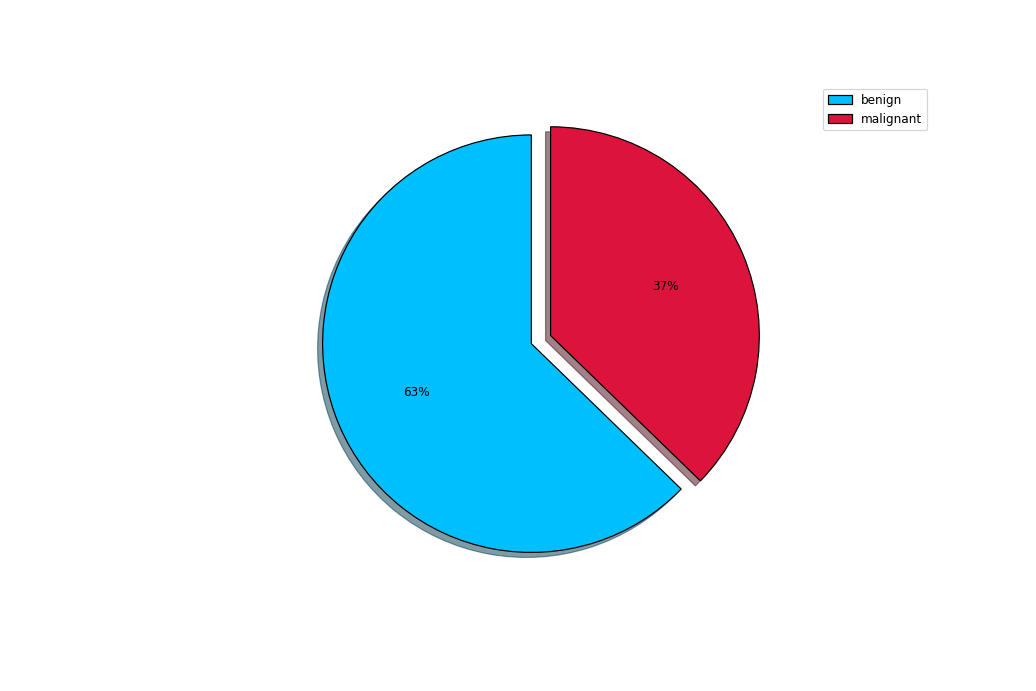

In [122]:
get_percent_target(cancer_df)
#Lấy series của cột target
%matplotlib notebook
df_target = get_percent_target(cancer_df)

#Trực quan %
plt.figure(figsize=(12,8))
plt.axis('equal');
# colors = ['#008fd5', '#fc4f30']
colors = ['deepskyblue', 'crimson']
plt.pie(df_target, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, 
        explode = (0, 0.1), autopct='%1.f%%',shadow=True);
plt.legend(loc='best', labels=df_target.index, fontsize='medium')